Q1. What is the purpose of grid search cv in machine learning, and how does it work?

Grid Search CV, or GridSearchCV, is a technique used for hyperparameter tuning in machine learning. The purpose of Grid Search CV is to systematically search for the optimal hyperparameter values for a model by evaluating its performance across a predefined grid of parameter combinations. This process helps find the hyperparameter values that result in the best model performance on a specified performance metric.

### Key Components and Steps of Grid Search CV:

1. **Define Hyperparameter Grid:**
   - Specify a grid of hyperparameter values to be explored. Each hyperparameter has a set of possible values to be tested.

2. **Define Model:**
   - Choose the machine learning algorithm and create an instance of the model.

3. **Define Evaluation Metric:**
   - Select a performance metric (e.g., accuracy, precision, recall, F1-score) to evaluate the model's performance during grid search.

4. **Cross-Validation:**
   - Split the training dataset into multiple folds (usually k-folds). Grid Search CV will perform cross-validation for each combination of hyperparameters.

5. **Grid Search:**
   - For each combination of hyperparameters:
     - Train the model on k-1 folds of the training data.
     - Evaluate the model on the remaining fold.
     - Repeat this process for all folds and average the performance metric.

6. **Select Best Hyperparameters:**
   - Identify the hyperparameter combination that resulted in the best average performance across all folds.

7. **Train Final Model:**
   - Train the final model using the identified best hyperparameters on the entire training dataset.

### Example (Python using scikit-learn):



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train, y_train)


In this example, GridSearchCV is used to search for the best hyperparameters for a RandomForestClassifier. The hyperparameter grid includes different values for the number of estimators, maximum depth, minimum samples split, and minimum samples leaf. The algorithm then evaluates different combinations of these hyperparameters using 5-fold cross-validation and selects the combination that maximizes accuracy.

Grid Search CV is a powerful technique for finding the optimal hyperparameter values, but it can be computationally expensive, especially with a large search space. Randomized Search CV is an alternative that samples hyperparameter combinations randomly, reducing the search space and computation time.

Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose
one over the other?

Ans - **Grid Search CV vs. Randomized Search CV:**

**Grid Search CV:**

- **Search Strategy:**
  - Exhaustively searches through all possible combinations of hyperparameter values specified in the grid.
  
- **Hyperparameter Values:**
  - Requires defining a grid of hyperparameter values to be explored for each hyperparameter.

- **Computationally Expensive:**
  - Can be computationally expensive, especially when the search space is large, as it tests all possible combinations.

- **Search Space:**
  - Suitable for a relatively small search space where it is feasible to test all combinations.

- **Usage:**
  - Commonly used when the hyperparameter search space is not too large and when a comprehensive search is desired.

**Randomized Search CV:**

- **Search Strategy:**
  - Samples a fixed number of hyperparameter combinations from the specified search space randomly.

- **Hyperparameter Values:**
  - Requires defining a probability distribution for each hyperparameter, and samples are drawn from these distributions.

- **Computational Efficiency:**
  - More computationally efficient than Grid Search CV, especially when the search space is large, as it tests a random subset of combinations.

- **Search Space:**
  - Suitable for large or continuous search spaces where testing all combinations is impractical.

- **Usage:**
  - Commonly used when the hyperparameter search space is extensive, and it may not be feasible to perform an exhaustive search.

**Choosing Between Grid Search CV and Randomized Search CV:**

1. **Search Space Size:**
   - **Grid Search CV:** Suitable for a relatively small search space.
   - **Randomized Search CV:** Preferred for large or continuous search spaces.

2. **Computational Resources:**
   - **Grid Search CV:** Can be computationally expensive, especially with a large search space.
   - **Randomized Search CV:** More computationally efficient, as it tests a random subset of combinations.

3. **Comprehensive vs. Exploratory Search:**
   - **Grid Search CV:** Conducts a comprehensive search of the entire grid.
   - **Randomized Search CV:** Provides an exploratory search by sampling a subset of combinations.

4. **Known vs. Unknown Search Space:**
   - **Grid Search CV:** Suitable when the range of hyperparameter values is known.
   - **Randomized Search CV:** Can be useful when the optimal range of hyperparameter values is not well-defined.

5. **Trade-off Between Precision and Efficiency:**
   - **Grid Search CV:** Offers precision but might be impractical for large search spaces.
   - **Randomized Search CV:** Sacrifices precision for computational efficiency.

**Scenario Examples:**

- **Scenario 1 (Grid Search):**
  - You have a small search space, and you want to ensure an exhaustive search for the best hyperparameters.

- **Scenario 2 (Randomized Search):**
  - You have a large search space, and testing all combinations is computationally expensive. Randomized search allows you to explore a representative subset efficiently.

In practice, the choice between Grid Search CV and Randomized Search CV depends on factors such as the size of the hyperparameter search space, available computational resources, and the desire for precision in hyperparameter tuning.

Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

Ans - **Data leakage** in machine learning occurs when information from the test set (or unseen data) unintentionally influences the model's training process. This leads to overly optimistic performance estimates during model evaluation but can result in poor generalization to new, unseen data. Data leakage can significantly impact the model's reliability and effectiveness.

**Why Data Leakage is a Problem:**

1. **Overestimated Model Performance:**
   - Data leakage can artificially inflate model performance metrics during training and evaluation, giving a false sense of the model's effectiveness.

2. **Poor Generalization:**
   - Models affected by data leakage may not generalize well to new, unseen data, as they have unintentionally learned patterns specific to the training or validation sets.

3. **Misleading Model Selection:**
   - Data leakage can lead to the selection of suboptimal models or features, as their apparent performance is based on information that should not be available during training.

4. **Biased Decision-Making:**
   - Models influenced by data leakage may make biased predictions in real-world scenarios, as they may rely on information that is not available during deployment.

**Examples of Data Leakage:**

1. **Target Leakage:**
   - **Description:**
     - The target variable (dependent variable) leaks information from the future into the training set.
   - **Example:**
     - Predicting whether a customer will churn based on whether they canceled their subscription in the next month. If the model includes information about future events (cancellation), it is prone to data leakage.

2. **Feature Leakage:**
   - **Description:**
     - Information is used as a feature that would not be available during the deployment phase.
   - **Example:**
     - Predicting stock prices based on financial indicators, where the model accidentally includes future stock prices as features. This can lead to unrealistic performance during training but poor performance on new data.

3. **Time-Based Leakage:**
   - **Description:**
     - The model uses information from the future to predict events in the past.
   - **Example:**
     - Predicting whether a patient will experience a particular health condition based on future medical test results. The model should not have access to information that occurs after the prediction target date.

4. **Data Preprocessing Leakage:**
   - **Description:**
     - The preprocessing steps, such as scaling or imputing missing values, use information from the entire dataset, including the test set.
   - **Example:**
     - Scaling features based on the entire dataset, including the test set, leading to information leakage. Scaling should be done separately for the training and test sets.

**Preventing Data Leakage:**

1. **Split Data Properly:**
   - Ensure a clear separation between training, validation, and test sets to prevent information flow from future data to past data.

2. **Feature Engineering Awareness:**
   - Be cautious when creating new features and ensure that they are based only on information available up to the point in time being considered.

3. **Time-Based Splits:**
   - In time-series data, use time-based splitting to ensure that the training set comes before the validation and test sets.

4. **Holdout Data:**
   - Keep a holdout dataset that is not used in any way during model development for final evaluation.

5. **Feature Scaling Separation:**
   - Scale features independently for the training and test sets to avoid using global statistics that include information from both.

Data leakage is a critical issue in machine learning, and awareness, careful preprocessing, and proper validation techniques are essential to prevent it. Regular monitoring and validation during model development are crucial to identifying and addressing potential sources of data leakage.

Q4. How can you prevent data leakage when building a machine learning model?

Ans - Preventing data leakage is crucial to ensure the integrity and generalizability of a machine learning model. Here are several strategies to prevent data leakage during the various stages of model development:

### 1. **Proper Data Splitting:**

- **Description:**
  - Ensure a clear separation between the training, validation, and test sets.

- **Action:**
  - Use appropriate techniques for data splitting, such as random splitting, time-based splitting for time-series data, or other domain-specific methods.

### 2. **Time-Based Splits:**

- **Description:**
  - In time-series data, make sure that the training set precedes the validation and test sets in time.

- **Action:**
  - Use time-based splitting techniques to maintain the temporal order of data.

### 3. **Holdout Dataset:**

- **Description:**
  - Keep a holdout dataset that is not used at any point during model development for final evaluation.

- **Action:**
  - Reserve a portion of the data as a holdout dataset, and refrain from using it for any form of training, validation, or hyperparameter tuning.

### 4. **Feature Engineering Awareness:**

- **Description:**
  - Be cautious when creating new features to avoid using information that would not be available during the deployment phase.

- **Action:**
  - Ensure that new features are derived from information that is logically available at the time of prediction, without incorporating future information.

### 5. **Feature Scaling Separation:**

- **Description:**
  - Scale features independently for the training and test sets to avoid using global statistics that include information from both.

- **Action:**
  - Perform feature scaling (e.g., normalization or standardization) separately for the training and test sets to prevent information leakage.

### 6. **Avoiding Target Leakage:**

- **Description:**
  - Ensure that the target variable used for prediction is not influenced by information from the future.

- **Action:**
  - Exclude features that provide information about the target variable's future state. Be aware of any features that might inadvertently include future information.

### 7. **Use Proper Cross-Validation Techniques:**

- **Description:**
  - When using cross-validation, ensure that each fold maintains the temporal order if applicable.

- **Action:**
  - Use time-aware cross-validation techniques, such as TimeSeriesSplit in scikit-learn, to maintain chronological order during cross-validation.

### 8. **Feature Importance Assessment:**

- **Description:**
  - When assessing feature importance, ensure that the evaluation is based on information available at the time of prediction.

- **Action:**
  - Use feature importance assessments carefully, and avoid using information that would not be available during the deployment phase.

### 9. **Regular Monitoring:**

- **Description:**
  - Regularly monitor and review the model development process for potential sources of data leakage.

- **Action:**
  - Establish a robust validation process and continuously assess the potential for data leakage as the model evolves.

### 10. **Documentation and Communication:**

- **Description:**
  - Clearly document data preprocessing steps and feature engineering choices.

- **Action:**
  - Communicate effectively with team members and stakeholders about the potential risks of data leakage and the measures taken to prevent it.

By implementing these preventive measures, machine learning practitioners can significantly reduce the risk of data leakage and ensure the model's reliability and generalization capabilities to new, unseen data. Regular validation and documentation practices contribute to maintaining the integrity of the modeling process.

Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

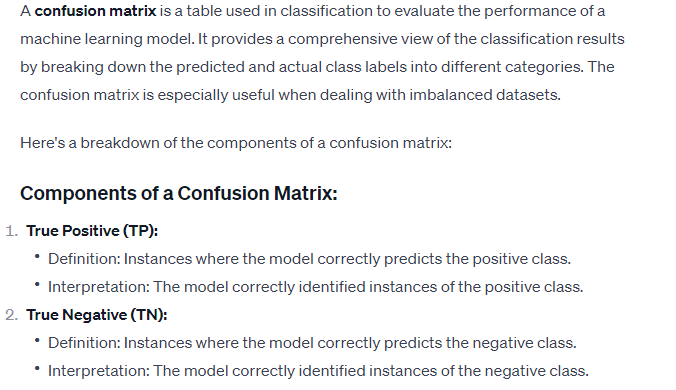
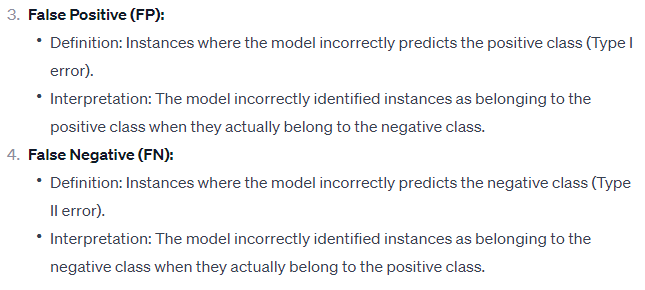

In [ ]:
                      Actual Class
                      (Positive)  (Negative)
Predicted Class     |  TP         FP
(Positive)          |  
                   |
Predicted Class     |  FN         TN
(Negative)          |  


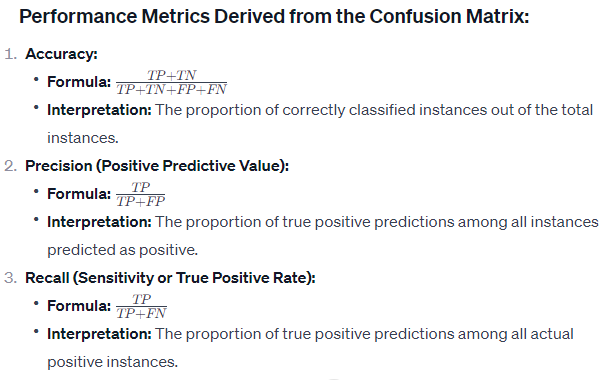
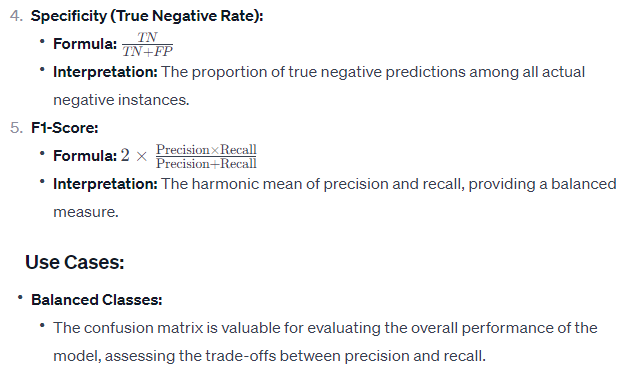
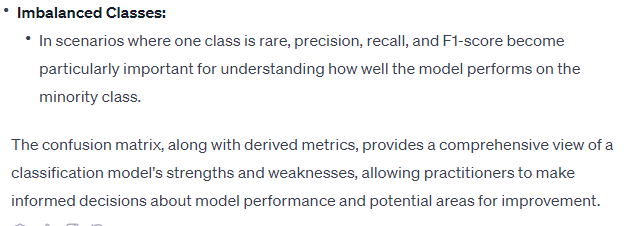

Q6. Explain the difference between precision and recall in the context of a confusion matrix.

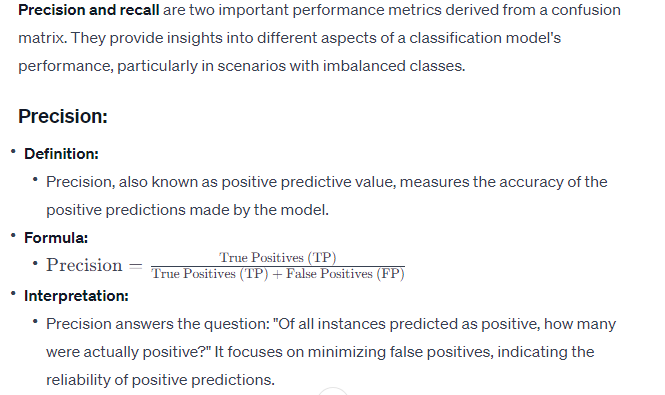
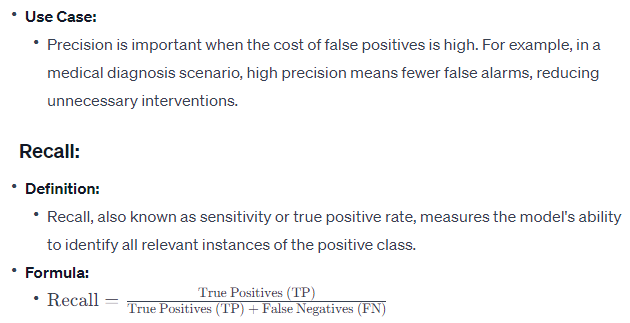
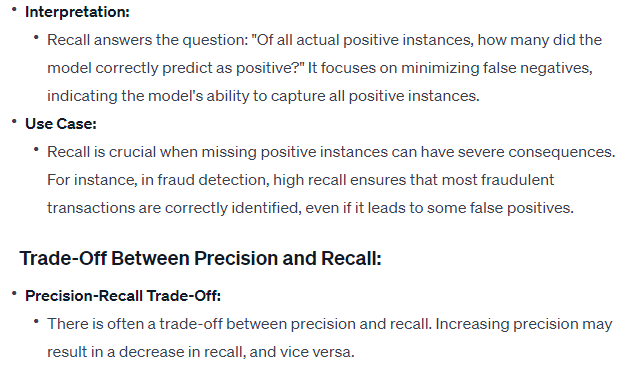
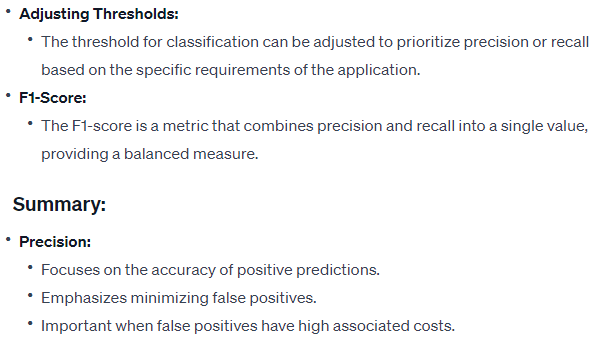
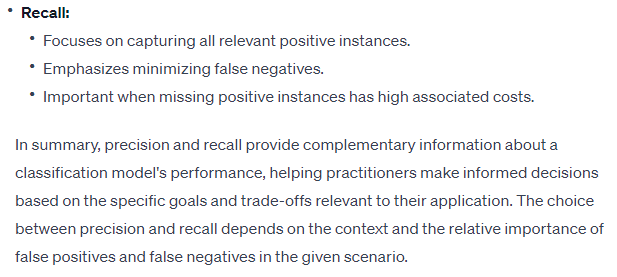

Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

Ans - A confusion matrix is a table that is often used to evaluate the performance of a classification model. It provides a summary of the model's predictions compared to the actual outcomes. The matrix is particularly useful for understanding the types of errors a model is making. Here's how you can interpret a confusion matrix:

Let's assume a binary classification problem with two classes: Positive (P) and Negative (N).

1. **True Positives (TP):** These are instances where the model correctly predicts positive outcomes. In a medical context, this might be cases where a model correctly identifies individuals with a disease.

2. **True Negatives (TN):** These are instances where the model correctly predicts negative outcomes. In a medical context, this might be cases where a model correctly identifies individuals without a disease.

3. **False Positives (FP):** These are instances where the model incorrectly predicts positive outcomes. Also known as Type I errors. In a medical context, this might be cases where a model wrongly classifies healthy individuals as having a disease.

4. **False Negatives (FN):** These are instances where the model incorrectly predicts negative outcomes. Also known as Type II errors. In a medical context, this might be cases where a model wrongly classifies individuals with a disease as being healthy.

The confusion matrix is typically represented as follows:

```
               Predicted
               |  P  |  N  |
Actual | P | TP | FP |
               | N | FN | TN |
```

From this matrix, you can calculate various performance metrics:

- **Accuracy:** (TP + TN) / (TP + TN + FP + FN)
- **Precision:** TP / (TP + FP)
- **Recall (Sensitivity or True Positive Rate):** TP / (TP + FN)
- **Specificity (True Negative Rate):** TN / (TN + FP)
- **F1 Score:** 2 * (Precision * Recall) / (Precision + Recall)

Interpreting these metrics helps you understand where your model is making mistakes. For example:

- **High Precision, Low Recall:** The model is cautious about making positive predictions but may miss many actual positives.
- **High Recall, Low Precision:** The model predicts a lot of positives, but many are incorrect.
- **Balanced Precision and Recall:** A good balance between false positives and false negatives.

Analyzing the confusion matrix and associated metrics gives insights into the strengths and weaknesses of your classification model.

Q8. What are some common metrics that can be derived from a confusion matrix, and how are they
calculated?

Ans - Several common metrics can be derived from a confusion matrix to evaluate the performance of a classification model. Here are some key metrics and their calculations:

1. **Accuracy:**
   - **Calculation:** (TP + TN) / (TP + TN + FP + FN)
   - **Interpretation:** Represents the overall correctness of the model.

2. **Precision (Positive Predictive Value):**
   - **Calculation:** TP / (TP + FP)
   - **Interpretation:** Indicates the proportion of true positive predictions among all positive predictions.

3. **Recall (Sensitivity or True Positive Rate):**
   - **Calculation:** TP / (TP + FN)
   - **Interpretation:** Measures the proportion of actual positive instances that were correctly predicted by the model.

4. **Specificity (True Negative Rate):**
   - **Calculation:** TN / (TN + FP)
   - **Interpretation:** Measures the proportion of actual negative instances that were correctly predicted by the model.

5. **F1 Score:**
   - **Calculation:** 2 * (Precision * Recall) / (Precision + Recall)
   - **Interpretation:** Harmonic mean of precision and recall, providing a balance between the two metrics.

6. **False Positive Rate (Fall-Out):**
   - **Calculation:** FP / (FP + TN)
   - **Interpretation:** Measures the proportion of actual negative instances that were incorrectly predicted as positive.

7. **False Negative Rate (Miss Rate):**
   - **Calculation:** FN / (FN + TP)
   - **Interpretation:** Measures the proportion of actual positive instances that were incorrectly predicted as negative.

8. **Matthews Correlation Coefficient (MCC):**
   - **Calculation:** (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
   - **Interpretation:** Takes into account all four elements of the confusion matrix, providing a balanced measure of classification performance.

9. **Area Under the ROC Curve (AUC-ROC):**
   - **Calculation:** Area under the Receiver Operating Characteristic curve.
   - **Interpretation:** Measures the model's ability to distinguish between classes across different probability thresholds.

10. **Area Under the Precision-Recall Curve (AUC-PR):**
    - **Calculation:** Area under the Precision-Recall curve.
    - **Interpretation:** Similar to AUC-ROC, but focuses on precision and recall.

These metrics provide a comprehensive understanding of the model's performance, considering aspects such as correctness, precision, recall, false positives, and false negatives. The choice of which metric to prioritize depends on the specific goals and requirements of the problem at hand.

Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

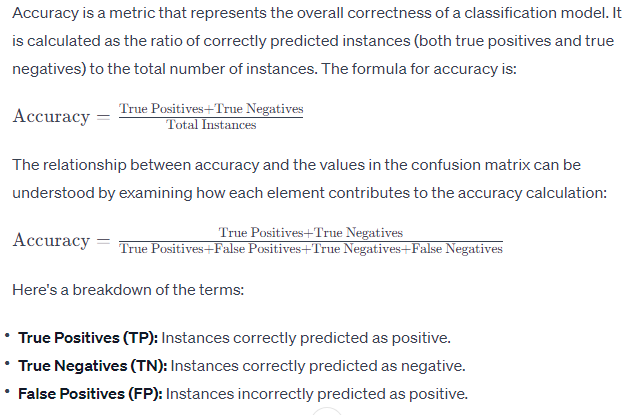
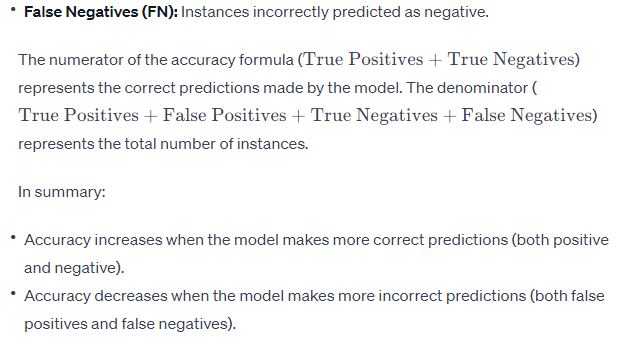
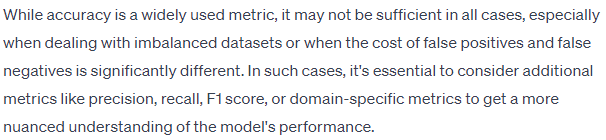

Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning
model?

Ans - A confusion matrix can be a valuable tool for identifying potential biases or limitations in your machine learning model, especially when dealing with classification tasks. Here are some ways to use a confusion matrix for this purpose:

1. **Class Imbalance:**
   - **Issue:** If one class significantly outnumbers the other, the model may become biased toward the majority class, leading to poor performance on the minority class.
   - **Identification:** Check for a disproportionate number of true positives and true negatives in each class. Look for instances where the model is consistently predicting one class over the other.

2. **False Positive and False Negative Rates:**
   - **Issue:** High false positive or false negative rates may indicate specific challenges or biases in the model's predictions.
   - **Identification:** Examine the false positive and false negative rates for each class. Understand which type of error is more prevalent and consider the consequences in the context of the problem.

3. **Misclassification Patterns:**
   - **Issue:** Patterns of misclassification may reveal areas where the model struggles or exhibits bias.
   - **Identification:** Examine the confusion matrix for patterns in misclassifications. Determine if certain classes are consistently confused with others, and investigate why these patterns exist.

4. **Sensitivity to Input Features:**
   - **Issue:** Some models may be sensitive to specific input features, leading to biased predictions.
   - **Identification:** Analyze the confusion matrix for different subsets of data or specific feature values. Determine if the model's performance varies significantly across different segments of the dataset.

5. **Fairness Concerns:**
   - **Issue:** Unintended biases may lead to unfair treatment of certain groups or individuals.
   - **Identification:** Evaluate the model's performance across different demographic groups. Check if there are disparities in prediction accuracy or error rates, especially concerning sensitive attributes like race, gender, or age.

6. **Threshold Effects:**
   - **Issue:** The choice of classification threshold can impact the model's performance.
   - **Identification:** Experiment with different classification thresholds and observe changes in the confusion matrix. Evaluate how the model's behavior changes based on the threshold and whether it introduces bias.

7. **Domain Expertise:**
   - **Issue:** Lack of understanding of the domain or problem may lead to biased model outcomes.
   - **Identification:** Consult domain experts to review the confusion matrix and provide insights into whether the model's predictions align with domain knowledge. Identify areas where the model may lack context.

By thoroughly analyzing the confusion matrix and considering these aspects, you can gain insights into potential biases and limitations in your machine learning model. Additionally, it's crucial to engage in ongoing monitoring and evaluation to address any biases that may emerge as the model is deployed in real-world scenarios. Regularly updating and retraining the model with diverse and representative data can help mitigate bias and improve generalization.